# [Computational Social Science] Project 4: Unsupervised Learning

Enter your Name: Saada Amadu

Semester: Fall 2024

## Data Description and Preprocessing

For this project, you will explore data from the [National Health and Nutrition Examination Survey](https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey?select=questionnaire.csv). NHANES is a unique study that combines survey methodology with in-person medical examinations to create a dataset with demographic information, health indicators, and health outcomes.

We start by importing the data and doing some preliminary preprocessing for you. We import some libraries that will be helpful as well. 'SEQN' is the ID number for each respondent, and 'HSD010' will be our target outcome. [HSD010](https://wwwn.cdc.gov/Nchs/Nhanes/2013-2014/HSQ_H.htm#HSD010) asks for the respondent's self reported health condition, which can range from "excellent" to "poor."

In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set_style("darkgrid")
from sklearn.model_selection import train_test_split

In [2]:
# Load nhanes data
nhanes = pd.read_csv('nhanes.csv')
# Get the ID numbers for each observation (seqn)
seqn = nhanes['SEQN']
# Get the target, "self-reported health condition," HSD010
hsd010 = nhanes['HSD010']
# Drop SEQN from the dataframe and then apply the standard scaler
nhanes = nhanes.drop(['SEQN', 'HSD010'], axis = 1)
nhanes_scaled = pd.DataFrame(StandardScaler().fit_transform(nhanes),
                             columns = nhanes.columns)
# Add the ID and target back in
nhanes_scaled['SEQN'] = seqn
nhanes_scaled['HSD010'] = hsd010
nhanes_scaled = nhanes_scaled.set_index('SEQN')
nhanes_scaled.head()

,DR1DRSTZ,DR1EXMER,DRABF,DRDINT,DR1DBIH,DR1DAY,DR1LANG,DR1MNRSP,DR1HELPD,DBQ095Z,...,OHQ770,OHQ845,PAAQUEX,SMQ860,SMQ870,SMQ872,SMQ874,SMQ878,SMAQUEX.x,HSD010
SEQN,,,,,,,,,,,,,,,,,,,,,
73568,0.0,2.034312,0.0,0.324834,-0.393906,1.085853,-0.194202,-0.057306,0.128246,-0.189513,...,0.383802,-0.646584,-0.484200,1.125008,0.0,-2.081666,1.087115,1.463404,0.612440,1
73576,0.0,0.261930,0.0,-3.078499,0.568251,0.634362,-0.194202,-0.057306,0.128246,0.080373,...,0.383802,-1.539259,-0.484200,1.125008,0.0,-2.081666,1.087115,-0.683338,-1.632812,1
73579,0.0,0.728346,0.0,0.324834,1.530407,-1.623092,-0.194202,-0.057306,0.128246,-0.189513,...,0.383802,-1.539259,2.065262,-0.888883,0.0,0.480384,-0.919866,-0.683338,-1.632812,2
73581,0.0,-0.857470,0.0,0.324834,0.480782,1.085853,-0.194202,-0.057306,0.128246,0.080373,...,0.383802,-0.646584,-0.484200,1.125008,0.0,0.480384,-0.919866,-0.683338,0.612440,2
73584,0.0,0.495138,0.0,0.324834,0.305844,-1.623092,-0.194202,-0.057306,0.128246,0.080373,...,-2.605509,0.246091,2.065262,1.125008,0.0,0.480384,-0.919866,1.463404,-1.632812,3


In [3]:
column_names = nhanes_scaled.columns
print("Column Names in the Dataset:")
print(column_names.tolist())  

Column Names in the Dataset:
['DR1DRSTZ', 'DR1EXMER', 'DRABF', 'DRDINT', 'DR1DBIH', 'DR1DAY', 'DR1LANG', 'DR1MNRSP', 'DR1HELPD', 'DBQ095Z', 'DRQSPREP', 'DR1STY', 'DRQSDIET', 'DR1TNUMF', 'DR1TKCAL', 'DR1TPROT', 'DR1TCARB', 'DR1TSUGR', 'DR1TFIBE', 'DR1TTFAT', 'DR1TSFAT', 'DR1TMFAT', 'DR1TPFAT', 'DR1TCHOL', 'DR1TATOC', 'DR1TRET', 'DR1TVARA', 'DR1TBCAR', 'DR1TLZ', 'DR1TVB1', 'DR1TVB2', 'DR1TNIAC', 'DR1TVB6', 'DR1TFOLA', 'DR1TFA', 'DR1TFF', 'DR1TFDFE', 'DR1TCHL', 'DR1TVB12', 'DR1TVC', 'DR1TVD', 'DR1TVK', 'DR1TCALC', 'DR1TPHOS', 'DR1TMAGN', 'DR1TIRON', 'DR1TZINC', 'DR1TCOPP', 'DR1TSODI', 'DR1TPOTA', 'DR1TSELE', 'DR1TMOIS', 'DR1TS040', 'DR1TS060', 'DR1TS080', 'DR1TS100', 'DR1TS120', 'DR1TS140', 'DR1TS160', 'DR1TS180', 'DR1TM161', 'DR1TM181', 'DR1TM201', 'DR1TP182', 'DR1TP183', 'DR1TP204', 'DR1.300', 'DR1TWS', 'DRD340', 'DRD360', 'PEASCST1', 'PEASCTM1', 'BPXPULS', 'BMDSTATS', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXARML', 'BMXARMC', 'BMXWAIST', 'MGDEXSTS', 'OHDEXSTS', 'OHDDESTS', 'OHX01TC', 'OHX02TC',

## Plots

Let's take a look at the data. Below we visualize boxplots of family income to federal poverty line ratio ('INDFMPIR') and self-reported health condition. Notice how there are some clear patterns (the lower the ratio, the lower reported health condition), but it's not a perfect separation. We have 240+ features in our dataset, and we likely have several features in our dataset that highly correlate with our family income-poverty line ratio measure - PCA will help us simplify these.

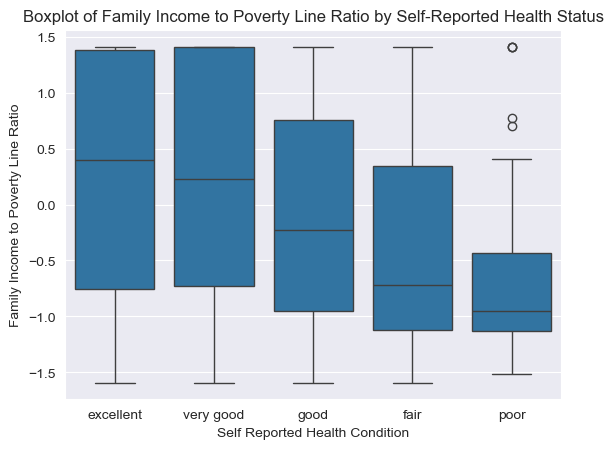

In [4]:
# Create a binary version of hsd010 where 1-3 are "good" and 4-5 are "poor"
nhanes_scaled['HSD010_binary'] = hsd010_binary = nhanes_scaled['HSD010'].replace(
    [1, 2, 3, 4, 5], ['good', 'good', 'good', 'poor', 'poor']) 
# Recode the original hsd010 with the string labels
nhanes_scaled['HSD010'] = nhanes_scaled['HSD010'].replace(
    [1, 2, 3, 4, 5], ['excellent', 'very good', 'good', 'fair', 'poor'])
# Boxplot of hsd010
ax = sns.boxplot(x = 'HSD010', y = 'INDFMPIR', data = nhanes_scaled)
ax.set(xlabel = "Self Reported Health Condition",
      ylabel = "Family Income to Poverty Line Ratio")
ax.set_title("Boxplot of Family Income to Poverty Line Ratio by Self-Reported Health Status")
plt.show()

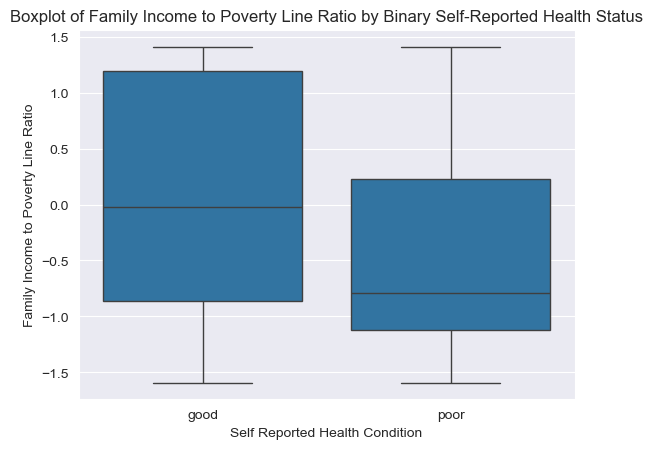

In [5]:
# Boxplot of hsd010_binary
ax = sns.boxplot(x = 'HSD010_binary', y = 'INDFMPIR', data = nhanes_scaled)
ax.set(xlabel = "Self Reported Health Condition",
      ylabel = "Family Income to Poverty Line Ratio")
ax.set_title("Boxplot of Family Income to Poverty Line Ratio by Binary Self-Reported Health Status")
plt.show()

Family income also is not necessarily well correlated with measured health outcomes. See below where we look at the relationship between Body Mass Index (BMI) and the family income-poverty line ratio, and shade points by self-reported health condition. It's hard to find a clear pattern - this is where clustering may come in handy. 

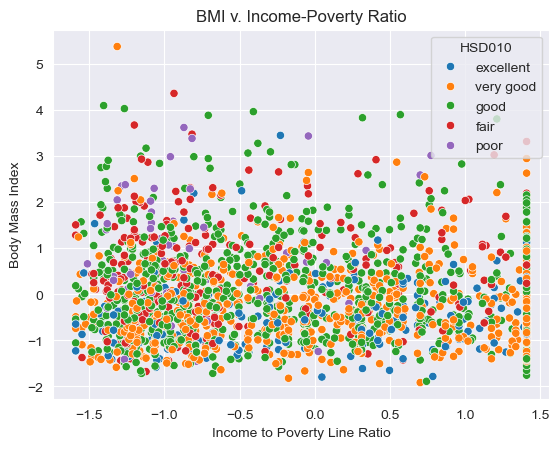

In [6]:
ax = sns.scatterplot(x = "INDFMPIR", y = "BMXBMI", hue = "HSD010", palette = "tab10", data = nhanes_scaled)
ax.set(xlabel = "Income to Poverty Line Ratio",
      ylabel = "Body Mass Index")
ax.set_title("BMI v. Income-Poverty Ratio")
plt.show()

In [7]:
my_HSD010 = nhanes_scaled['HSD010']

Before we move to working on unsupervised methods, we'll drop our target variables again:

In [8]:
nhanes_scaled = nhanes_scaled.drop(['HSD010', 'HSD010_binary'], axis = 1)

## Principal Component Analysis

Conduct a Principal Component Analysis (PCA) of the nhanes data. The data has already been prepared for you, so you can work directly on nhanes_scaled. Be sure to do the following:

- Choose the number of components and provide 1-2 sentences about your choice of the number of components. 
- Plot a barplot of the variation explained by each component. *Hint*: look at the attributes associated with your model.
- Choose how many components you will use to fit a supervised learning model and provide 1-2 sentences to explain that choice.
- Plot a 2D scatterplot of the first two components and provide 1-2 sentences analyzing the plot.

### Train PCA and Discuss Number of Components

In [9]:
nhanes_scaled.shape

(2064, 241)

Using 145 principal components because it collectively explain approximately 95% of the variance in the dataset. 

In [10]:
## Your Answer Here

# PCA
pca = PCA()
pca_result = pca.fit_transform(nhanes_scaled)

# calculating cumulative explained variance
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = pca.explained_variance_ratio_.cumsum()

# number of components for 95% variance
num_components = (cumulative_variance_ratio >= 0.95).argmax() + 1
print(f"Number of components to explain 95% variance: {num_components}")

Number of components to explain 95% variance: 145


### Barplot of Components

<Figure size 640x480 with 0 Axes>

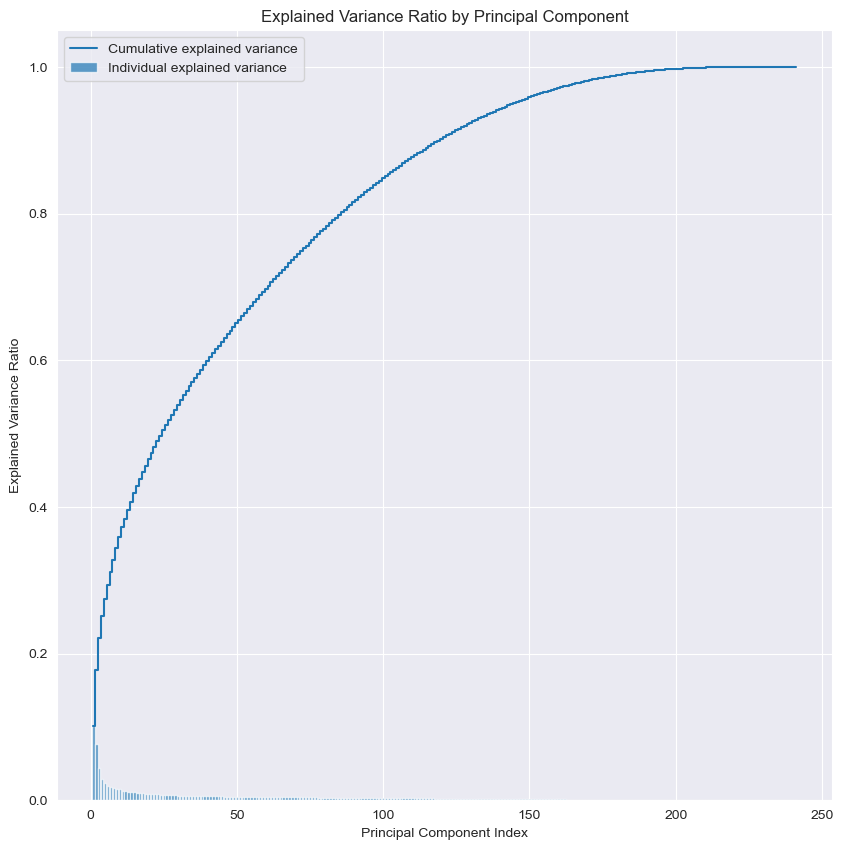

In [11]:
## Your Answer Here

# plotting variance ratio
plt.figure()
plt.figure(figsize=(10, 10))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, label='Individual explained variance')
plt.step(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, where='mid', label='Cumulative explained variance')
plt.xlabel('Principal Component Index')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by Principal Component')
plt.legend(loc='best')
plt.show()

### How many components will you use to fit a supervised learning model?

95% of the variance with approximately 145 components ensure that most of the dataset’s variability is preserved. This ensures that most of the meaningful variability in the data is retained while reducing the feature space.

### 2D Scatterplot of the first two components

The scatterplot reveals grouping of data points, suggesting underlying relationships in the dataset that may be important for classification. My interpretation shows one, large main cluster and potentially 1-2 smaller clusters. Some points are positioned far from the main clusters and could mean outliers that differ significantly from the rest of the data set.

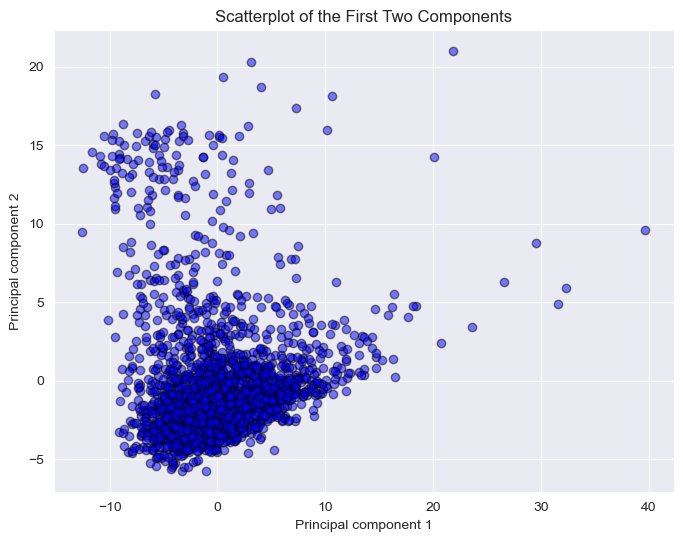

In [12]:
## Your Answer Here

# scatterplot of the first two components
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5, c='blue', edgecolor='k')
plt.xlabel('Principal component 1')
plt.ylabel('Principal component 2')
plt.title('Scatterplot of the First Two Components')
plt.grid(True)
plt.show()

## K-Means is an unsupervised machine learning technique which groups data points into different clusters based on their similarities. It is a good method for analyzing the NHANES data because it is great at handling large datasets and the NHANES has over 250 features and potentially thousands of observations. K-Means works best with the elbow method it is effective when the elbow point is identified there balancing clustering quality and complexity.

- Choose a clustering algorithm and explain it in 1-2 sentences.
- Cluster the nhanes data. Detail any choice you need to make with regards to number of clusters, and how you arrived at that choice. For instance, you might use the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) if you choose k-means.
- Plot your clusters on top of BMI v. Income Poverty Ratio Plot. Describe what you see in 1-2 sentences.
- Retrain the clustering algorithm, but this time use your PCA results instead of the original dataframe. Plot the clusters on top of the 2D PCA scatterplot from the previous step. Describe your results in 1-2 sentences.

The elbow method is a graphical used to determine the number of clusters in a dataset. The elbow point is the point where the plots starts to flatten out. In the elbow plot below, the rate of change drops around 4 clusters and not a lot of new information can be gleaned from it.

### Choose a Clustering Algorithm

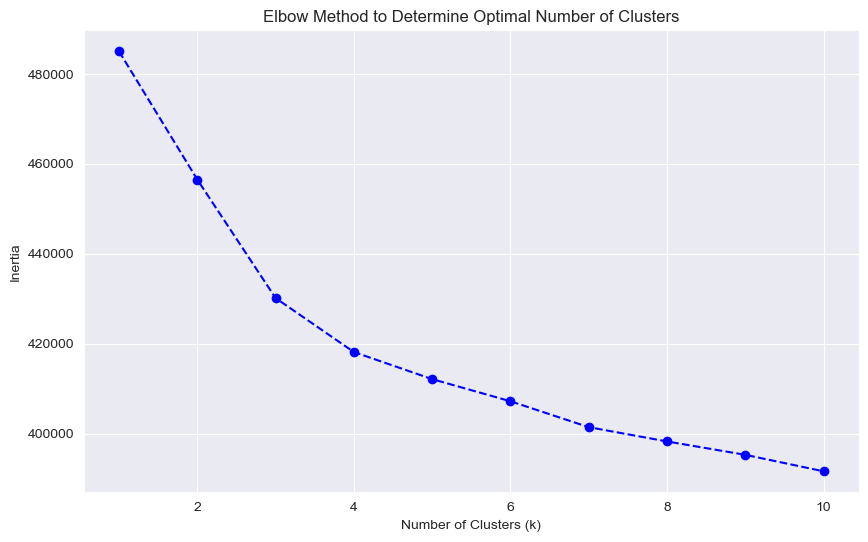

In [13]:
## Your Answer Here

# calculating optimal number of clusters using the Elbow Method
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(nhanes_scaled)
    inertia.append(kmeans.inertia_)

# plotting the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

### Cluster nhanes

In [14]:
## Your Answer Here

# training K-Means with clusters
optimal_clusters = 4 
kmeans_original = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters_original = kmeans_original.fit_predict(nhanes_scaled)

### Plot your clusters on top of the BMI v. Income Poverty Ratio Plot

The clusters plot below shows how BMI and Income-to-Poverty Ratio relate across clusters. The plot is all over the place and does not seem to show shared characteristics between BMI and Income-to-Poverty Ratio. The blue-green divide in the outcome seems somewhat separated but the purple cluster seems all over the place.

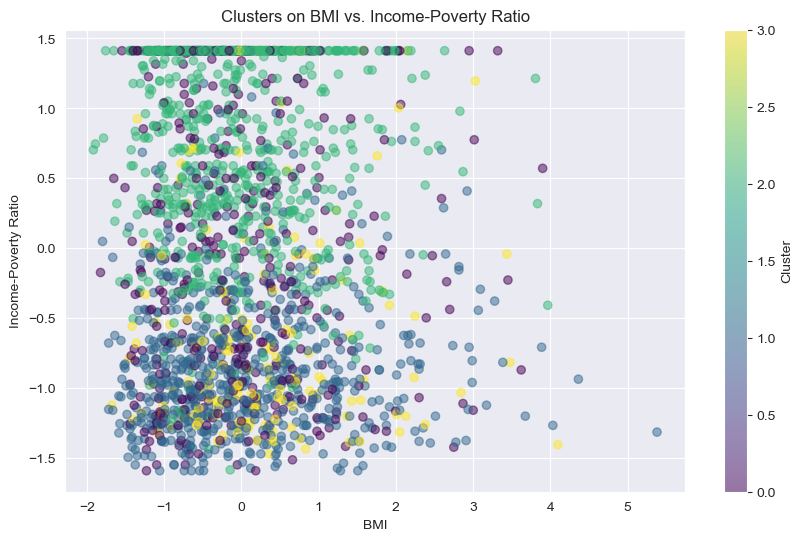

In [15]:
## Your Answer Here

# BMI and income-to-poverty ratio
bmi = nhanes_scaled['BMXBMI']
income_poverty_ratio = nhanes_scaled['INDFMPIR']

# plotting clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(bmi, income_poverty_ratio, c=clusters_original, cmap='viridis', alpha=0.5)
plt.colorbar(scatter, label='Cluster')
plt.xlabel('BMI')
plt.ylabel('Income-Poverty Ratio')
plt.title('Clusters on BMI vs. Income-Poverty Ratio')
plt.grid(True)
plt.show()

### Retrain the clustering algorithm on PCA components and plot clusters on your 2D scatter

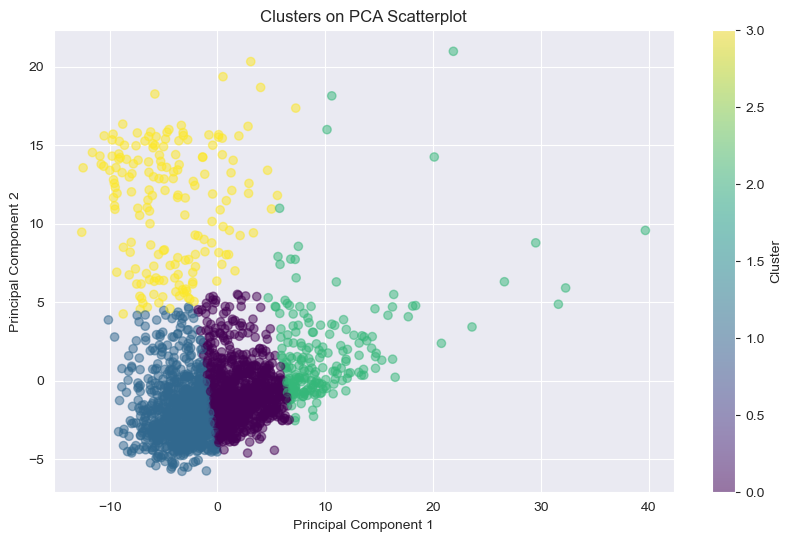

In [16]:
## Your Answer Here

# performing PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(nhanes_scaled)

# retraining K-Means on PCA-transformed data
clusters_pca = kmeans_original.fit_predict(pca_result)

# plotting clusters on PCA scatterplot
plt.figure(figsize=(10, 6))
scatter_pca = plt.scatter(pca_result[:, 0], pca_result[:, 1], c=clusters_pca, cmap='viridis', alpha=0.5)
plt.colorbar(scatter_pca, label='Cluster')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters on PCA Scatterplot')
plt.grid(True)
plt.show()

In the plot above, four clusters: yellow, green, purple, and blue, are shown. The clusters are mostly distintive with hint of overlap between the purple and blue clusters. The blue, purple, and green clusters are rather compact with the yellow cluster more spread out, possibly representing outliers in the dataset.

## Neural Network

Now we are ready to predict! Do the following:

- Choose either HSD010 or HSD010\_binary as your target outcome.  
- Train a neural network using the original features. Much of the code to train a basic neural net has been set up for you, but you will need to fill in a couple of missing pieces.
- Train a neural network using only your PCA components as features.
- Train a neural network using your PCA components and the predicted class membership from your clustering algorithm as features.
- Compare and contrast how well each algorithm did. Which featurization technique would you pick and why?

Below we provide a template for training a neural network. Use this template for training on the original features, on the PCA components, and the PCA components + the predicted classes from your clusters.

### Neural Network on Original Features

In [17]:
column_names = nhanes_scaled.columns
for column in column_names:
    print(column)

DR1DRSTZ
DR1EXMER
DRABF
DRDINT
DR1DBIH
DR1DAY
DR1LANG
DR1MNRSP
DR1HELPD
DBQ095Z
DRQSPREP
DR1STY
DRQSDIET
DR1TNUMF
DR1TKCAL
DR1TPROT
DR1TCARB
DR1TSUGR
DR1TFIBE
DR1TTFAT
DR1TSFAT
DR1TMFAT
DR1TPFAT
DR1TCHOL
DR1TATOC
DR1TRET
DR1TVARA
DR1TBCAR
DR1TLZ
DR1TVB1
DR1TVB2
DR1TNIAC
DR1TVB6
DR1TFOLA
DR1TFA
DR1TFF
DR1TFDFE
DR1TCHL
DR1TVB12
DR1TVC
DR1TVD
DR1TVK
DR1TCALC
DR1TPHOS
DR1TMAGN
DR1TIRON
DR1TZINC
DR1TCOPP
DR1TSODI
DR1TPOTA
DR1TSELE
DR1TMOIS
DR1TS040
DR1TS060
DR1TS080
DR1TS100
DR1TS120
DR1TS140
DR1TS160
DR1TS180
DR1TM161
DR1TM181
DR1TM201
DR1TP182
DR1TP183
DR1TP204
DR1.300
DR1TWS
DRD340
DRD360
PEASCST1
PEASCTM1
BPXPULS
BMDSTATS
BMXWT
BMXHT
BMXBMI
BMXARML
BMXARMC
BMXWAIST
MGDEXSTS
OHDEXSTS
OHDDESTS
OHX01TC
OHX02TC
OHX03TC
OHX04TC
OHX05TC
OHX06TC
OHX07TC
OHX08TC
OHX09TC
OHX10TC
OHX11TC
OHX12TC
OHX13TC
OHX14TC
OHX15TC
OHX16TC
OHX17TC
OHX18TC
OHX19TC
OHX20TC
OHX21TC
OHX22TC
OHX23TC
OHX24TC
OHX25TC
OHX26TC
OHX27TC
OHX28TC
OHX29TC
OHX30TC
OHX31TC
OHX32TC
URXUMA
URXUMS
URXUCR.x
URXCRS
URDACT
LBXWBCS

In [18]:
# partition data
# -----------
my_HSD010 = my_HSD010.replace(
    ['excellent', 'very good', 'good', 'fair', 'poor'], [0, 1, 2, 3, 4])

y = my_HSD010 # either hsd010 or hsd010_binary, may need to convert to numeric if it isn't already 
X = nhanes_scaled.drop(columns=['HSD010'], errors='ignore') # drop out any columns that aren't features

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = .25, 
                                                    random_state = 10)

/var/folders/hw/_vg0xz2j4_lccf3f4z_wn1yc0000gn/T/ipykernel_76695/2900317737.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_HSD010 = my_HSD010.replace(


In [19]:
my_HSD010.value_counts()

HSD010
2    821
1    672
3    273
0    239
4     59
Name: count, dtype: int64

In [20]:
# load libraries
# -----------
import keras
from keras.utils import to_categorical
from keras.optimizers import Adam

num_classes = 5
# converting class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
num_classes = y_test.shape[1]

In [21]:
# create neural network model
# -----------

model = Sequential()

model.add(Dense(128, input_dim=X_train.shape[1], kernel_initializer='he_uniform', activation='relu'))

model.add(Dense(5, kernel_initializer='he_uniform', activation='softmax'))


## Add any additional layers you wish here

model.compile(loss='categorical_crossentropy' if num_classes > 2 else 'binary_crossentropy',
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

model.fit(X_train, y_train,
                    validation_data=(X_test, y_test),
                    epochs=50,  
                    batch_size=32,
                    verbose=1)

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3306 - loss: 1.7418 - val_accuracy: 0.4109 - val_loss: 1.4657
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - accuracy: 0.5034 - loss: 1.1989 - val_accuracy: 0.4128 - val_loss: 1.3796
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 947us/step - accuracy: 0.6150 - loss: 0.9832 - val_accuracy: 0.4399 - val_loss: 1.3511
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - accuracy: 0.6582 - loss: 0.8631 - val_accuracy: 0.4477 - val_loss: 1.3440
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 894us/step - accuracy: 0.7188 - loss: 0.7665 - val_accuracy: 0.4360 - val_loss: 1.3433
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 957us/step - accuracy: 0.7731 - loss: 0.6637 - val_accuracy: 0.4457 - val_loss: 1.3523
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 921us/step - accuracy: 0.8320 - loss: 0.5880 - val_accuracy: 0.4554 - val_loss: 1.3594
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.8458 - loss: 0.5309 - val_accuracy: 0.4709 - val_lo

### Neural Network on Principal Components

In [22]:
# Build the Keras Sequential model

from sklearn.metrics import classification_report

# performing PCA

pca = PCA(n_components=20)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model_PCA = Sequential()

# input Layer
model_PCA.add(Dense(128, input_dim=X_train_pca.shape[1], kernel_initializer='he_uniform', activation='relu'))

# hidden Layers
model_PCA.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
model_PCA.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))

# output Layer
model_PCA.add(Dense(num_classes, kernel_initializer='he_uniform', activation='softmax'))

# compiling model
model_PCA.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# training  model
model_PCA.fit(
    X_train_pca, y_train,
    validation_data=(X_test_pca, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# evaluating the model
y_pred_pca = model_PCA.predict(X_test_pca)
print(classification_report(y_test.argmax(axis=1), y_pred_pca.argmax(axis=1)))

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2421 - loss: 2.5943 - val_accuracy: 0.3721 - val_loss: 1.4352
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.4696 - loss: 1.3013 - val_accuracy: 0.3876 - val_loss: 1.3386
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 919us/step - accuracy: 0.5171 - loss: 1.1801 - val_accuracy: 0.4147 - val_loss: 1.3025
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step - accuracy: 0.5454 - loss: 1.1032 - val_accuracy: 0.4225 - val_loss: 1.3049
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - accuracy: 0.5783 - loss: 1.0622 - val_accuracy: 0.4341 - val_loss: 1.2878
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - accuracy: 0.5941 - loss: 1.0340 - val_accuracy: 0.4477 - val_loss: 1.2932
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - accuracy: 0.6257 - loss: 0.9863 - val_accuracy: 0.4244 - val_loss: 1.3068
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 965us/step - accuracy: 0.6319 - loss: 0.9508 - val_accuracy: 0.4205 - val_lo

### Neural Network on Principal Components + Cluster Membership

In [23]:
## Your Answer Here

from sklearn.neural_network import MLPClassifier

# performing clustering
kmeans = KMeans(n_clusters=4, random_state=10)  
train_clusters = kmeans.fit_predict(X_train_pca)
test_clusters = kmeans.predict(X_test_pca)

# adding cluster labels as features
X_train_clustered = pd.DataFrame(X_train_pca)
X_train_clustered['Cluster'] = train_clusters
X_train_clustered.columns = X_train_clustered.columns.astype(str) 

X_test_clustered = pd.DataFrame(X_test_pca)
X_test_clustered['Cluster'] = test_clusters
X_test_clustered.columns = X_test_clustered.columns.astype(str) 

# training neural network
model_PCA_clusters = Sequential()

# input Layer
model_PCA_clusters.add(Dense(128, input_dim=X_train_clustered.shape[1], kernel_initializer='he_uniform', activation='relu'))

# hidden Layers
model_PCA_clusters.add(Dense(64, kernel_initializer='he_uniform', activation='relu'))
model_PCA_clusters.add(Dense(32, kernel_initializer='he_uniform', activation='relu'))

# output Layer
model_PCA_clusters.add(Dense(num_classes, kernel_initializer='he_uniform', activation='softmax'))

# compiling model
model_PCA_clusters.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(learning_rate=0.001),
    metrics=['accuracy']
)

# training  model
model_PCA_clusters.fit(
    X_train_clustered, y_train,
    validation_data=(X_test_clustered, y_test),
    epochs=50,
    batch_size=32,
    verbose=1
)

# evaluating the model
y_pred_clustered = model_PCA_clusters.predict(X_test_clustered)
print(classification_report(y_test.argmax(axis=1), y_pred_clustered.argmax(axis=1)))

Epoch 1/50


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3632 - loss: 2.1192 - val_accuracy: 0.4283 - val_loss: 1.4420
Epoch 2/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 820us/step - accuracy: 0.4768 - loss: 1.2829 - val_accuracy: 0.4109 - val_loss: 1.3925
Epoch 3/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 812us/step - accuracy: 0.4827 - loss: 1.2121 - val_accuracy: 0.4167 - val_loss: 1.3490
Epoch 4/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 807us/step - accuracy: 0.5275 - loss: 1.1635 - val_accuracy: 0.4089 - val_loss: 1.3745
Epoch 5/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.5387 - loss: 1.0954 - val_accuracy: 0.4147 - val_loss: 1.3636
Epoch 6/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 802us/step - accuracy: 0.5807 - loss: 1.0353 - val_accuracy: 0.4302 - val_loss: 1.3514
Epoch 7/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.5985 - loss: 0.9889 - val_accuracy: 0.4070 - val_loss: 1.3513
Epoch 8/50
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - accuracy: 0.6267 - loss: 0.9426 - val_accuracy: 0.4128 - val_lo

## Discussion Questions

1. In your own words, what is the difference between PCA and clustering?

Principal Component Analysis and Clustering are techniques used in data analysis. PCA's goal is to reduce the number of features in a dataset while retaining as much information as possible and transforms the data into a new set of variables called principal components. While clustering's main goal is to divide data points into groups/clusters based on their similarity. Each cluster contains points that are more similar to each other than to points in other clusters.

2. Did you notice any advantages to combining PCA and clustering? If so, what do you think they were? If not, why do you think you didn't see any gains from this combination?

Combining PCA and clustering can enhance performance in data analysis by leveraging the strengths of both techniques.
There is some advantage to combining PCA and clustering in this scenario since the overall scores for precision, recall, and f1 improved slightly. The weighted average of the f1-score improved but not by a lot.

3. How can unsupervised techniques help with downstream supervised learning tasks when working with "big data?"

They can help with reducing the number of features while retaining most of the data's variance. Also, by eliminating redundant or irrelevant features to improve model performance and interpretability. Additionally, they provide a good starting point for supervised learning, potentiallyleading to higher accuracy. They are also great for providing insights into the data distribution by identifying outliers. They are also great at removing noise by focusing on the most significant patterns in a dataset.